# Mini Project 3  - IU 4.6 Machine Learning

## Project Topic: Reducing churn by identifying high-risk customers for the Telecom industry
About the Project:
    
•	A major telecom company's postpaid business of voice-only plans is struggling to maintain its strong foothold in the local market due to:

	High churn rate amongst customers leading to a revenue decline of ~500k USD every month.

	The decline in overall customer base (high churn rate combined with low acquisition rate), leading to a decline in total market share.

•	The project focuses on applying predictive analytics and identifying the factors that impact customer churn.


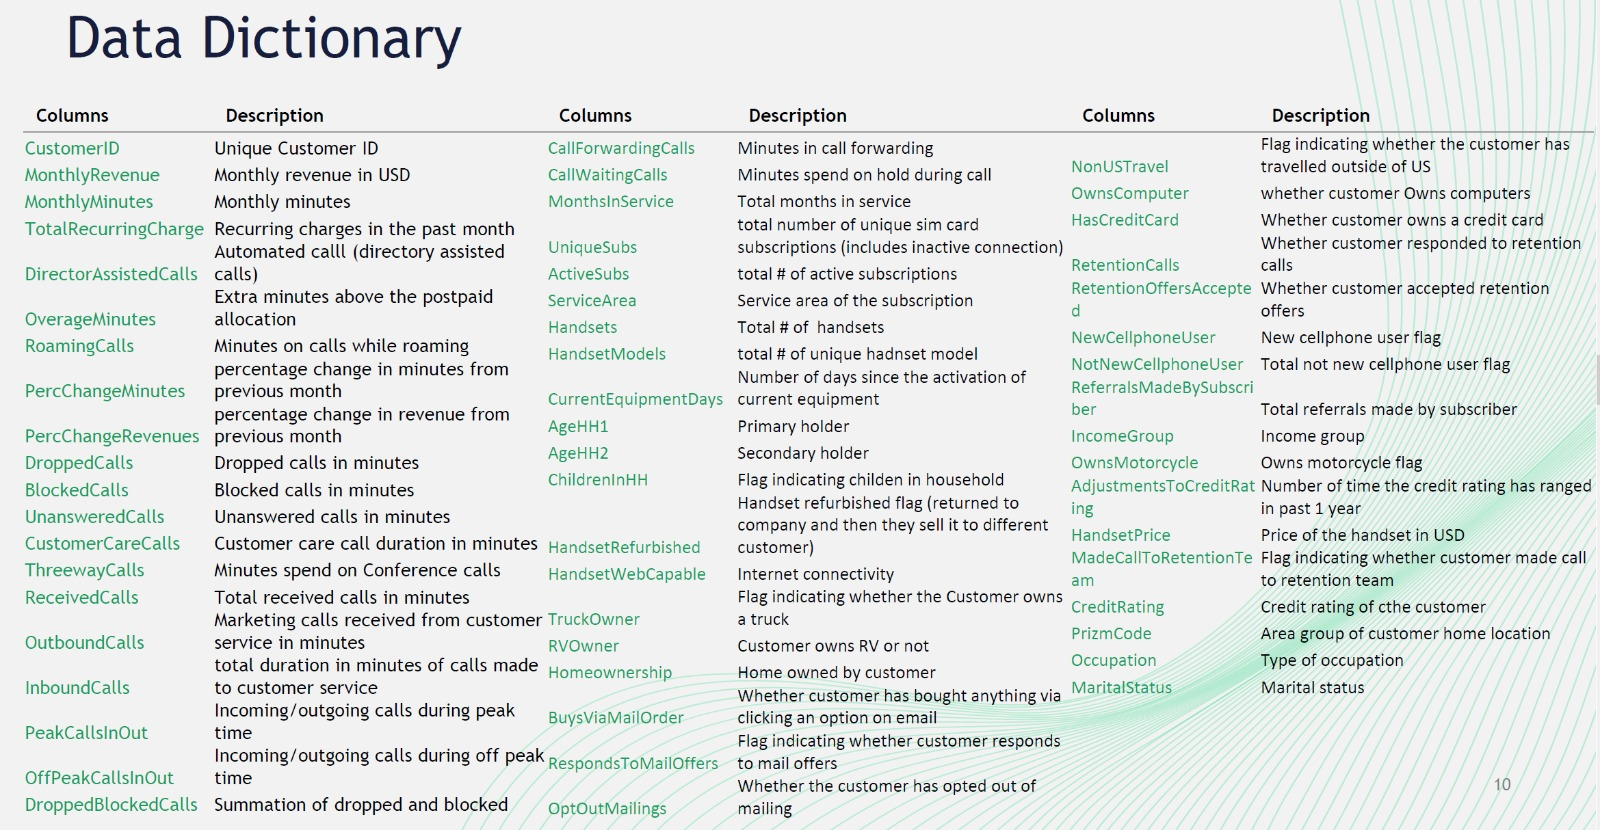

## Packages and setup

In [81]:
pwd()

'C:\\Users\\Pranav\\Upgrad\\UpKh_Python\\Project and Deployment'

In [82]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from copy import deepcopy
#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading data and initial processing

In [83]:
cust_df=pd.read_csv("Telecom Data.csv")

## Exercise

## Placeholder for your analysis

In [84]:
# Type your code here to explore and understand the data better

#e.g., identify the dimension of cust_df
cust_df.shape

(51047, 58)

In [85]:
cust_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [86]:
cust_df["CreditRating"].unique()

array(['1-Highest', '4-Medium', '3-Good', '6-VeryLow', '2-High', '5-Low',
       '7-Lowest'], dtype=object)

In [87]:
cust_df["ServiceArea"].unique()

array(['SEAPOR503', 'PITHOM412', 'MILMIL414', 'OKCTUL918', 'OKCOKC405',
       'SANMCA210', 'SLCSLC801', 'LOULOU502', 'KCYKCK913', 'KCYNEW316',
       'KCYKCM816', 'DENDEN303', 'PHICTR610', 'OKCLRK501', 'OMADES515',
       'SANAUS512', 'KCYWIC316', 'INDIND317', 'SLCPRO801', 'OMALNC402',
       'NSHNSH615', 'OMAOMA402', 'PHXTUC520', 'DALDAL214', 'DALDTN940',
       'DALFTW817', 'SANSAN210', 'NYCMAN917', 'NOLKEN504', 'MINMIN612',
       'NNYROC716', 'PHIARD610', 'NYCQUE917', 'DENBOU303', 'BOSBOS617',
       'PHXPHX602', 'NNYBUF716', 'DETTOL419', 'NNYSYR315', 'STLSTL314',
       'PHIPHI215', 'SEABLV425', 'MIAMIA305', 'PHICHC215', 'SEASEA206',
       'BIRBIR205', 'MIADFD954', 'LOUNAL812', 'MIADEL561', 'MIAFTL954',
       'SEASPO509', 'SEATAC253', 'SFRSAC916', 'MIANDA305', 'MINSTP612',
       'MIAHWD954', 'NYCBRO917', 'PHIJEN215', 'OMACDR319', 'MIAWPB561',
       'SEAOLY360', 'PITBUT412', 'SEAEVE425', 'PHIMER609', 'SEACDA208',
       'HARHAR860', 'SFRSFR415', 'SFROAK510', 'SFRSCL408', 'NNYA

In [88]:
cust_df.select_dtypes(include=['object']).columns

Index(['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus'],
      dtype='object')

In [89]:
cust_df["ServiceArea"].nunique()

747

In [90]:
cust_df["Churn"].value_counts() ## data is imbalanced 

No     36336
Yes    14711
Name: Churn, dtype: int64

<AxesSubplot:xlabel='MonthlyRevenue', ylabel='Density'>

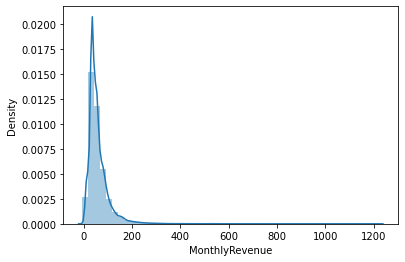

In [91]:
sns.distplot(cust_df["MonthlyRevenue"])

[]

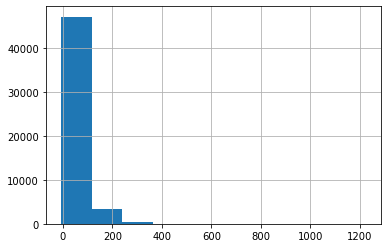

In [92]:
cust_df["MonthlyRevenue"].hist().plot()

In [93]:
cust_df["MonthlyRevenue"].describe()

count    50891.000000
mean        58.834492
std         44.507336
min         -6.170000
25%         33.610000
50%         48.460000
75%         71.065000
max       1223.380000
Name: MonthlyRevenue, dtype: float64

In [94]:
#check unique customer
cust_df.CustomerID.nunique()/cust_df.shape[0]

1.0

In [95]:
cust_df.Churn.value_counts()

No     36336
Yes    14711
Name: Churn, dtype: int64

In [96]:
# % of churn customer
100*cust_df.Churn.value_counts()/cust_df.shape[0]

No     71.18146
Yes    28.81854
Name: Churn, dtype: float64

## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [97]:
#How many customers had zero monthly revenue?
#Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis
cust_df[cust_df.MonthlyRevenue== 0].shape[0]

cust_df = cust_df[cust_df.MonthlyRevenue > 0.0]

## excluding customers with zero monthly minutes from cust_df
cust_df = cust_df[cust_df["MonthlyMinutes"]>0.0]

## removed inactive customers 

6

### Q1.2 How many columns has missing values percentage > 5%

In [98]:
#Calculate for each column % of missing value in the data
#How many columns has missing values percentage > 5% 

## there are no columns with missing value greater than 5%

## to check null/na in the data
100*(cust_df.isnull().sum()/cust_df.shape[0])

#What strategy should be used for imputation?

# since the count of missing value is negligible I believe we can simply drop those rows
cust_df.dropna(axis=0,inplace=True)
cust_df.shape[0]

CustomerID                   0.000000
Churn                        0.000000
MonthlyRevenue               0.000000
MonthlyMinutes               0.000000
TotalRecurringCharge         0.000000
DirectorAssistedCalls        0.000000
OverageMinutes               0.000000
RoamingCalls                 0.000000
PercChangeMinutes            0.344883
PercChangeRevenues           0.344883
DroppedCalls                 0.000000
BlockedCalls                 0.000000
UnansweredCalls              0.000000
CustomerCareCalls            0.000000
ThreewayCalls                0.000000
ReceivedCalls                0.000000
OutboundCalls                0.000000
InboundCalls                 0.000000
PeakCallsInOut               0.000000
OffPeakCallsInOut            0.000000
DroppedBlockedCalls          0.000000
CallForwardingCalls          0.000000
CallWaitingCalls             0.000000
MonthsInService              0.000000
UniqueSubs                   0.000000
ActiveSubs                   0.000000
ServiceArea 

49078

<mark>__Result:__
    
    
    
    Since the percentage of missing number is small, i believe we can drop the rows with missing data

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

<AxesSubplot:>

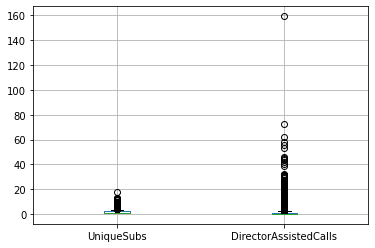

In [99]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

,UniqueSubs,DirectorAssistedCalls
0.95,3.0,4.21
0.96,3.0,4.70
0.97,4.0,5.69
0.98,4.0,6.93
0.99,5.0,9.65
1.00,18.0,159.39


<AxesSubplot:>

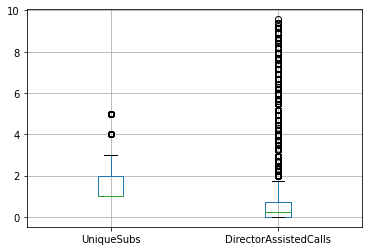

In [100]:
#Remove top 1% outliers from the above mentioned two columns and plot the box plot again
#Use "quantile" function to identify top 1% outliers
q_value = [i/100 for i in range(95,101,1)]
cust_df[cols].quantile(q_value)

## filtering the cust_df data with 99% value
cust_df = cust_df[(cust_df.UniqueSubs <= 5) & (cust_df.DirectorAssistedCalls <= 9.6156)]
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

<AxesSubplot:xlabel='MonthlyRevenue', ylabel='OverageMinutes'>

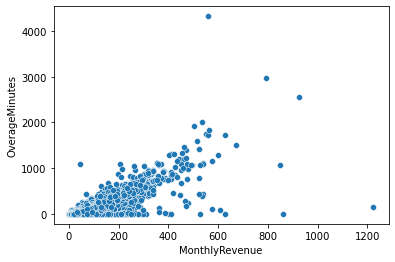

In [101]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df)

Text(0.5, 1.0, 'Non Churned customer')

<AxesSubplot:title={'center':'Non Churned customer'}, xlabel='MonthlyRevenue', ylabel='OverageMinutes'>

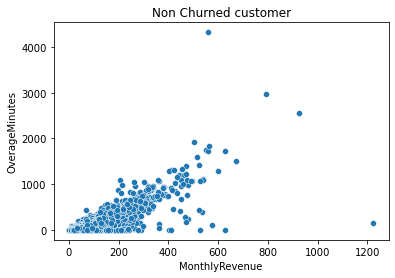

Text(0.5, 1.0, 'Churned customer')

<AxesSubplot:title={'center':'Churned customer'}, xlabel='MonthlyRevenue', ylabel='OverageMinutes'>

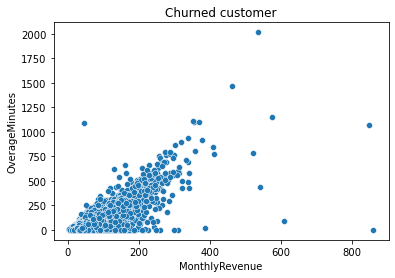

In [102]:
plt.title("Non Churned customer")
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df[cust_df.Churn=="No"])
plt.show()

plt.title("Churned customer")
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df[cust_df.Churn=="Yes"])
plt.show()

<mark>__Result:__
    
Type your interpretation here based on the scatter plot analysis
    
    there seem to be strong correlation between monthly revenue and overage minutes

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

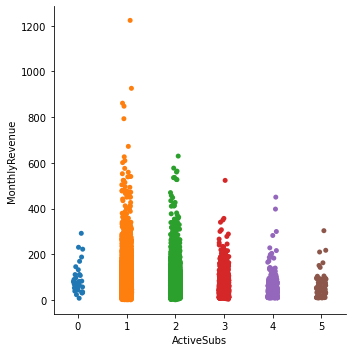

In [103]:
#use category plot to plot monthly revenue for each active subs category
sns.catplot(x="ActiveSubs",y="MonthlyRevenue",data = cust_df ) 

<mark>__Result:__
    
Type your interpretation here based on the category plot analysis
    
    It seems with the higher number of category plot the monthly revenue decreases 

### Q2.3 Does credit rating have an impact in churn rate?

In [104]:
pd.crosstab(cust_df.Churn, cust_df.CreditRating).apply(lambda r: r/r.sum(), axis=0)
pd.crosstab(cust_df.Churn, cust_df.CreditRating).apply(lambda r: r/r.sum(), axis=1)

CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,0.698608,0.7039,0.69738,0.745876,0.785889,0.739905,0.718026
Yes,0.301392,0.2961,0.30262,0.254124,0.214111,0.260095,0.281974


CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,0.161849,0.371062,0.160179,0.109358,0.138555,0.017938,0.041060
Yes,0.177734,0.397318,0.176928,0.094840,0.096086,0.016051,0.041044


<mark>__Result:__
    
Type your interpretation here based on the analysis above
    
    It seems people irrespective of their credit rating customers are churning and the proportion of churned custmer is 
    larger on high credit score. 

### Placeholder for additional exploratory analysis

In [105]:
## EDA 

## Q3. Create additional features to help predict churn

In [106]:
#wrapper function to create additional features for churn prediction
def create_features(cust_df):
    
    #3.1 Percent of current active subs over total subs
#     cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    cust_df['perc_recurrent_charge']= cust_df['TotalRecurringCharge'] / cust_df["MonthlyRevenue"]
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    cust_df['perc_overage_minute']= cust_df['OverageMinutes'] / cust_df["MonthlyMinutes"]
    
    #type your code here to creat any other additional features which you think will help improve your model accuracy
    #3.4 Percent of RoamingCalls minutes over total monthly minutes
    cust_df['perc_Roaming_Calls']= cust_df['RoamingCalls'] / cust_df["MonthlyMinutes"]

    #3.5 Percent of DroppedCalls minutes over total monthly minutes
    cust_df['perc_Dropped_Calls']= cust_df['DroppedCalls'] / cust_df["MonthlyMinutes"]
    
    #3.6 Percent of BlockedCalls minutes over total monthly minutes
    cust_df['perc_Blocked_Calls ']= cust_df['BlockedCalls'] / cust_df["MonthlyMinutes"]
    
    #3.7 Percent of UnansweredCalls minutes over total monthly minutes
    cust_df['perc_Unanswered_Calls']= cust_df['UnansweredCalls'] / cust_df["MonthlyMinutes"]
    
    #3.8 Percent of CustomerCareCalls minutes over total monthly minutes
    cust_df['perc_Customer_Care_Calls']= cust_df['CustomerCareCalls'] / cust_df["MonthlyMinutes"]
    
    #3.9 Percent of ThreewayCalls minutes over total monthly minutes
    cust_df['perc_Threeway_Calls']= cust_df['ThreewayCalls'] / cust_df["MonthlyMinutes"]
    
    #3.10 Percent of ReceivedCalls minutes over total monthly minutes
    cust_df['perc_Received_Calls']= cust_df['ReceivedCalls'] / cust_df["MonthlyMinutes"]
    
    #3.11 Percent of OutboundCalls minutes over total monthly minutes
    cust_df['perc_OutboundCalls']= cust_df['OutboundCalls'] / cust_df["MonthlyMinutes"]
    
    #3.12 Percent of InboundCalls minutes over total monthly minutes
    cust_df['perc_Inbound_Calls']= cust_df['InboundCalls'] / cust_df["MonthlyMinutes"]
    
    #3.13 Percent of PeakCallsInOut minutes over total monthly minutes
    cust_df['perc_PeakCalls_InOut']= cust_df['PeakCallsInOut'] / cust_df["MonthlyMinutes"]
    
    #3.14 Percent of OffPeakCallsInOut minutes over total monthly minutes
    cust_df['perc_Off_PeakCalls_InOut']= cust_df['OffPeakCallsInOut'] / cust_df["MonthlyMinutes"]
    
    #3.15 Percent of OffPeakCallsInOut minutes over total monthly minutes
    cust_df['perc_Off_PeakCalls_InOut']= cust_df['OffPeakCallsInOut'] / cust_df["MonthlyMinutes"]
    
    return cust_df  


In [107]:
#Make a call to the feature engineering wrapper function for churn prediction
cust_df=create_features(cust_df)

In [108]:
## A function that helps to separate the columns whether they are categorical or continous variable.
## It returns list of categroical and continous variable names
def check_categorical(cust_df):
    colnames = cust_df.columns
    categorical_col = []
    continous_col = []
    
    for i in colnames:
        if cust_df[i].nunique() < 20:
            if i != "Churn":
                categorical_col.append(i)
        else:
            if i not in  ["CustomerID","ServiceArea"]:
                continous_col.append(i)
    
    return (categorical_col,continous_col)

In [109]:
## a function that does chisqr test to validate whether the categorical variable is idependent of the churn rate or not.
## it helps us to filterout the categorical varaibles that has impact on churn.
import  scipy
def check_categorical_imp(cust_df,categorical_col):
    new_categorical_col = []
    for i in categorical_col:
        if scipy.stats.chi2_contingency(pd.crosstab(cust_df.Churn, cust_df[i]))[1] > 0.05:
            pass
        else:
            new_categorical_col.append(i)
            
    return new_categorical_col


In [110]:
categorical_col,continous_col = check_categorical(cust_df)

In [111]:
categorical_col

['UniqueSubs',
 'ActiveSubs',
 'HandsetModels',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'RetentionCalls',
 'RetentionOffersAccepted',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'ReferralsMadeBySubscriber',
 'IncomeGroup',
 'OwnsMotorcycle',
 'AdjustmentsToCreditRating',
 'HandsetPrice',
 'MadeCallToRetentionTeam',
 'CreditRating',
 'PrizmCode',
 'Occupation',
 'MaritalStatus']

In [112]:
cust_df.shape

(48374, 71)

In [113]:
cust_df.Churn.value_counts()

No     34730
Yes    13644
Name: Churn, dtype: int64

In [114]:
cust_df["Churn"]=cust_df["Churn"].replace([ "Yes",  "No"],  [1,0]) ## encoding 
class_count_0, class_count_1 = cust_df['Churn'].value_counts()


class_0 = cust_df[cust_df['Churn'] == 0]
class_1 = cust_df[cust_df['Churn'] == 1]# print the shape of the class

class_1_over = class_1.sample(class_count_0, replace=True)## over

test_over = pd.concat([class_1_over, class_0], axis=0)

cust_df = test_over
y = cust_df.Churn
y.value_counts()/len(y)*100


1    50.0
0    50.0
Name: Churn, dtype: float64

In [115]:

## filters categorcal and continous column names 

## passes all categorical variable and returns only those that have impact on the churn. 
important_categorical_col = check_categorical_imp(cust_df,categorical_col)

# ## converting the churn indicator to numeric variable
# cust_df["Churn"]=cust_df["Churn"].replace([ "Yes",  "No"],  [1,0])

## storing the churn flag variable in y 
y = cust_df.Churn          ## Target
customerid = cust_df.CustomerID
monthlyrevenue = cust_df.MonthlyRevenue
## keeping on the relevant columns from the data
cust_df = cust_df[important_categorical_col+continous_col]## Features 




#cust_df.drop(["Churn"],axis=1,inplace=True)
#customer_id = cust_df.CustomerID
#cust_df.drop(["CustomerID","ServiceArea"],axis=1,inplace=True)


## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [116]:
#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split

#Define columns to be included in X and y
# X = Independent variables
# Y = Dependent variable (churn flag)

#Feature scaling for all continuous variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

## scaling all continous variable from the dataframe
cust_df[continous_col] = sc.fit_transform(cust_df[continous_col])

#Create dummy variables for all categorical variables
cust_df = pd.get_dummies(cust_df, columns=important_categorical_col, drop_first=True)

In [117]:
y.value_counts()

1    34730
0    34730
Name: Churn, dtype: int64

In [118]:
## checking the proportion of churn and non churned customers
y.value_counts()/len(y)*100

1    50.0
0    50.0
Name: Churn, dtype: float64

In [119]:
len(important_categorical_col)

22

In [120]:
## splitting the customer churn data into train and test sets
cust_df["CustomerID"] = customerid
X = cust_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [121]:
y_train.value_counts()

1    24462
0    24160
Name: Churn, dtype: int64

In [122]:
X.shape

(69460, 142)

In [123]:
train_custid = X_train.CustomerID
test_custid = X_test.CustomerID
test_monthlyrevenue = X_test.MonthlyRevenue
X_train.drop(["CustomerID"],inplace=True,axis=1)
X_test.drop(["CustomerID"],inplace=True,axis=1)

### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


In [124]:
#-------------------------------- Model training -------------------------------#

#type your code to build logistic regression model on training data set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score,f1_score,plot_confusion_matrix,average_precision_score


logistic_classifier  = LogisticRegression(random_state=0).fit(X_train, y_train)
logistic_predt_train_output = logistic_classifier.predict_proba(X_train)[:, 1]

#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted model
logistic_predt_test_output = logistic_classifier.predict_proba(X_test)[:, 1]


In [134]:
logistic_classifier.score(X_train,y_train)

0.594751347126815

In [136]:
logistic_classifier.score(X_test,y_test)

0.5863326614838277

In [125]:

def efficient_cutoff(actual_value,predicted):
    probability_cutoff = []
    f1_score_value = []
    
    for i in range(0,101):
        predicted_x = deepcopy(predicted)
        predicted_x[predicted_x >= i / 100] = 1
        predicted_x[predicted_x < i / 100] = 0
        probability_cutoff.append(i/100)
        f1_score_value.append(f1_score(actual_value,predicted_x))
    
    return (probability_cutoff,f1_score_value)
            
        
    
    

Text(0.5, 0, 'probability cuttoff value train')

Text(0, 0.5, 'f1_score train ')

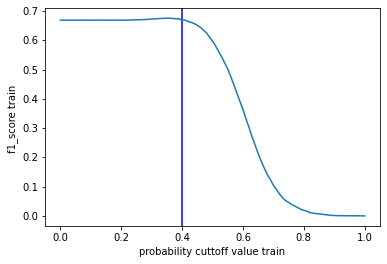

In [138]:
probability_cutoff,f1_score_value = efficient_cutoff(y_train,logistic_predt_train_output)

plt.xlabel("probability cuttoff value train")
plt.axvline(x = 0.4, color = 'b', label = 'axvline - full height')
plt.ylabel("f1_score train ")
plt.plot(probability_cutoff,f1_score_value)
plt.show()



In [127]:

#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)

logistic_predt_test_output[logistic_predt_test_output>=0.4] = 1
logistic_predt_test_output[logistic_predt_test_output <0.4] = 0

#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix
print(classification_report(y_test,logistic_predt_test_output))
auc = roc_auc_score(y_test, logistic_classifier.predict_proba(X_test)[:, 1])
print("gini :{}".format(2*auc - 1))
print("the ROC_AUC of logistic classifier for test data: {}".format(auc))
confusion_matrix(y_test, logistic_predt_test_output)
tn, fp, fn, tp = confusion_matrix(y_test, logistic_predt_test_output).ravel()
tn, fp, fn, tp

              precision    recall  f1-score   support

           0       0.67      0.23      0.35     10570
           1       0.53      0.88      0.66     10268

    accuracy                           0.55     20838
   macro avg       0.60      0.56      0.50     20838
weighted avg       0.60      0.55      0.50     20838

gini :0.24251626882058464
the ROC_AUC of logistic classifier for test data: 0.6212581344102923


array([[2463, 8107],
       [1230, 9038]], dtype=int64)

(2463, 8107, 1230, 9038)

### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [128]:
#-------------------------------- Model training -------------------------------#

#type your code to build random forest classifier model on training data set


from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=15,min_samples_split=50,random_state=40,criterion="entropy",n_estimators=350,n_jobs=-1)
clf.fit(X_train, y_train)
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data and train set using the fitted RF model
rf_train_output = clf.predict_proba(X_train)[:, 1]
rf_test_output = clf.predict_proba(X_test)[:, 1]


RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=50,
                       n_estimators=350, n_jobs=-1, random_state=40)

Text(0.5, 0, 'probability cuttoff value train')

Text(0, 0.5, 'f1_score train ')

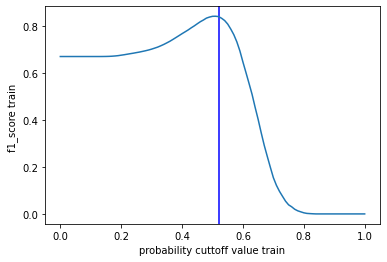

In [140]:
## plotting the f1_score vs the probility cutoff value
probability_cutoff,f1_score_value = efficient_cutoff(y_train,rf_train_output)

#plt.xticks(np.arange(1,100,10)/100)
plt.axvline(x = 0.52, color = 'b', label = 'axvline - full height')
plt.xlabel("probability cuttoff value train")
plt.ylabel("f1_score train ")
plt.plot(probability_cutoff,f1_score_value)
plt.show()



In [145]:
cut_offs_df = pd.DataFrame({"probability_cutoff":probability_cutoff,"F1_scores" : f1_score_value})
cut_offs_df

,probability_cutoff,F1_scores
0,0.00,0.669421
1,0.01,0.669421
2,0.02,0.669421
3,0.03,0.669421
4,0.04,0.669421
...,...,...
96,0.96,0.000000
97,0.97,0.000000
98,0.98,0.000000
99,0.99,0.000000


(array([ 173.,  626.,  995., 2261., 3604., 5150., 4882., 2420.,  643.,
          84.]),
 array([0.13787779, 0.20630693, 0.27473608, 0.34316522, 0.41159437,
        0.48002351, 0.54845266, 0.6168818 , 0.68531095, 0.75374009,
        0.82216924]),
 <BarContainer object of 10 artists>)

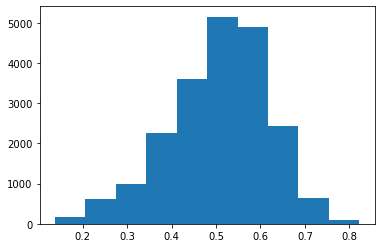

In [130]:
## plotting the histogram of the probability that the customer will churn
plt.hist(rf_test_output)

In [131]:

#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
rf_test_output[rf_test_output<0.53] = 0
rf_test_output[rf_test_output>=0.53]  = 1

print(classification_report(y_test,rf_test_output))
test_auc = roc_auc_score(y_test,clf.predict_proba(X_test)[:, 1])
print("gini :{}".format(2*test_auc - 1))
print("the ROC_AUC for test rf classifier: {}".format(test_auc))
#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix

confusion_matrix(y_test, rf_test_output)
tn, fp, fn, tp = confusion_matrix(y_test, rf_test_output).ravel()
tn, fp, fn, tp

              precision    recall  f1-score   support

           0       0.71      0.77      0.74     10570
           1       0.74      0.67      0.70     10268

    accuracy                           0.72     20838
   macro avg       0.72      0.72      0.72     20838
weighted avg       0.72      0.72      0.72     20838

gini :0.6112529894199688
the ROC_AUC for test rf classifier: 0.8056264947099844


array([[8099, 2471],
       [3349, 6919]], dtype=int64)

(8099, 2471, 3349, 6919)

<mark>__Result:__
    
Type your answer from the model building exercise here, i.e., which model has better accuracy and using what metrics?
    
    The random forest model has better predictive capability and the precisio,recall,confusionmatrix and auc value suggest 
    the same. We have selected the cutoff value in order to maximize the f1 score.
    
    

<Figure size 360x720 with 0 Axes>

Text(0.5, 1.0, 'feature Importance plot')

<AxesSubplot:title={'center':'feature Importance plot'}>

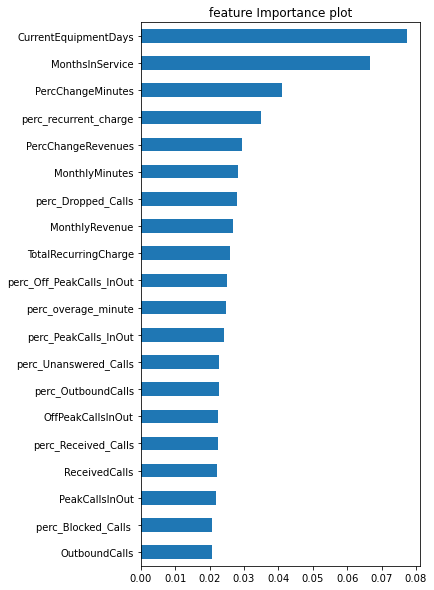

In [132]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created

feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
plt.figure(figsize=(5,10))
plt.title("feature Importance plot")
feat_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh',)
# .nlargest(20).sort(ascending=False)